# Question 1

Occupations  
Step 1. Import the necessary libraries  

In [40]:
import pandas as pd 
import requests

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

In [41]:
# URL of the data file to be fetched
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

# Send an HTTP GET request to the specified URL and retrieve the response
response = requests.get(url)

# Initialize an empty string to store the content of the response
content = ''

# Check if the response status code is 200 (OK)
if response.status_code == 200:
    # If the status code is 200, extract the content of the response
    content = response.content

# Display the content of the response
content


b'user_id|age|gender|occupation|zip_code\n1|24|M|technician|85711\n2|53|F|other|94043\n3|23|M|writer|32067\n4|24|M|technician|43537\n5|33|F|other|15213\n6|42|M|executive|98101\n7|57|M|administrator|91344\n8|36|M|administrator|05201\n9|29|M|student|01002\n10|53|M|lawyer|90703\n11|39|F|other|30329\n12|28|F|other|06405\n13|47|M|educator|29206\n14|45|M|scientist|55106\n15|49|F|educator|97301\n16|21|M|entertainment|10309\n17|30|M|programmer|06355\n18|35|F|other|37212\n19|40|M|librarian|02138\n20|42|F|homemaker|95660\n21|26|M|writer|30068\n22|25|M|writer|40206\n23|30|F|artist|48197\n24|21|F|artist|94533\n25|39|M|engineer|55107\n26|49|M|engineer|21044\n27|40|F|librarian|30030\n28|32|M|writer|55369\n29|41|M|programmer|94043\n30|7|M|student|55436\n31|24|M|artist|10003\n32|28|F|student|78741\n33|23|M|student|27510\n34|38|F|administrator|42141\n35|20|F|homemaker|42459\n36|19|F|student|93117\n37|23|M|student|55105\n38|28|F|other|54467\n39|41|M|entertainment|01040\n40|38|M|scientist|27514\n41|33|M|

Step 3. Assign it to a variable called users  

In [42]:
# Decode the binary content using UTF-8 encoding and split it into lines
lines = content.decode('utf-8').splitlines()

# Split the first line (header) into individual elements using '|' as the separator
heading = lines[0].split('|')

# Create a list of lists (2D list) containing the data by splitting each subsequent line using '|'
data = [line.split('|') for line in lines[1:]]

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Create a DataFrame using the extracted header as column names and the data as rows
users = pd.DataFrame(columns=heading, data=data)

# Display the first few rows of the created DataFrame
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation  

In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    object
 1   age         943 non-null    object
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: object(5)
memory usage: 37.0+ KB


In [44]:
users['age'] = users['age'].astype(int)

In [45]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
mean_age_per_occupation.head()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
Name: age, dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least  

In [46]:
male_ratio_per_occupation = users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()
male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)
print("Male ratio per occupation (sorted):\n", male_ratio_per_occupation)

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


Step 6. For each occupation, calculate the minimum and maximum ages  

In [47]:
age_stats_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("Age statistics by occupation:\n", age_stats_by_occupation)

Age statistics by occupation:
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


Step 7. For each combination of occupation and sex, calculate the mean age  

In [48]:
mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()

print("Maximum age of male programmers:", mean_age_by_occupation_gender)

Maximum age of male programmers: occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986


Step 8. For each occupation present the percentage of women and men  

In [49]:
# Group by 'occupation' and 'gender' columns and calculate the count of each gender
gender_counts_by_occupation = users.groupby(['occupation', 'gender']).size()

# Group by 'occupation' column and calculate the total count of each occupation
total_counts_by_occupation = users.groupby('occupation').size()

# Calculate the percentage of women and men for each occupation
occupation_gender_percentages = (gender_counts_by_occupation / total_counts_by_occupation.groupby('occupation').sum()) * 100


print("Average age by occupation:\n", occupation_gender_percentages)

Average age by occupation:
 occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
              

# Question 2

Euro Teams  
Step 1. Import the necessary libraries

In [11]:
import pandas as pd
import requests
from io import StringIO

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv)

In [12]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
response = requests.get(url)
content = ''
if response.status_code == 200:
    content = response.content
content

b'Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,Passing Accuracy,Touches,Crosses,Dribbles,Corners Taken,Tackles,Clearances,Interceptions,Clearances off line,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used\nCroatia,4,13,12,51.9%,16.0%,32,0,0,0,2,1076,828,76.9%,1706,60,42,14,49,83,56,,0,10,3,13,81.3%,41,62,2,9,0,9,9,16\nCzech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,1565,1223,78.1%,2358,46,68,21,62,98,37,2,1,10,6,9,60.1%,53,73,8,7,0,11,11,19\nDenmark,4,10,10,50.0%,20.0%,27,1,0,0,3,1298,1082,83.3%,1873,43,32,16,40,61,59,0,1,10,5,10,66.7%,25,38,8,4,0,7,7,15\nEngland,5,11,18,50.0%,17.2%,40,0,0,0,3,1488,1200,80.6%,2440,58,60,16,86,106,72,1,2,29,3,22,88.1%,43,45,6,5,0,11,11,16\nFrance,3,22,24,37.9%,6.5%,65,1,0,0,0,2066,1803,87.2%,2909,55,76,28,71,

Step 3. Assign it to a variable called euro12

In [13]:
lines = content.decode('utf-8').splitlines()
headings = lines[0].split(',')
data = [line.split(',') for line in lines[1:]]
euro12 = pd.DataFrame(columns = headings, data = data)

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [14]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [15]:
euro12.isna().sum()

Team                          0
Goals                         0
Shots on target               0
Shots off target              0
Shooting Accuracy             0
% Goals-to-shots              0
Total shots (inc. Blocked)    0
Hit Woodwork                  0
Penalty goals                 0
Penalties not scored          0
Headed goals                  0
Passes                        0
Passes completed              0
Passing Accuracy              0
Touches                       0
Crosses                       0
Dribbles                      0
Corners Taken                 0
Tackles                       0
Clearances                    0
Interceptions                 0
Clearances off line           0
Clean Sheets                  0
Blocks                        0
Goals conceded                0
Saves made                    0
Saves-to-shots ratio          0
Fouls Won                     0
Fouls Conceded                0
Offsides                      0
Yellow Cards                  0
Red Card

In [16]:
integer_columns = [ 'Goals', 'Shots on target', 'Shots off target',
 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used']

float_columns = ['Shooting Accuracy', '% Goals-to-shots', 'Passing Accuracy', 'Saves-to-shots ratio']

for column in integer_columns:
    euro12[column] = pd.to_numeric(euro12[column], errors='coerce').astype('Int64')
for column in float_columns:
    euro12[column] = euro12[column].str.replace('%','')
    euro12[column] = pd.to_numeric(euro12[column], errors='coerce').astype(float)


In [17]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     Int64  
 2   Shots on target             16 non-null     Int64  
 3   Shots off target            16 non-null     Int64  
 4   Shooting Accuracy           16 non-null     float64
 5   % Goals-to-shots            16 non-null     float64
 6   Total shots (inc. Blocked)  16 non-null     Int64  
 7   Hit Woodwork                16 non-null     Int64  
 8   Penalty goals               16 non-null     Int64  
 9   Penalties not scored        16 non-null     Int64  
 10  Headed goals                16 non-null     Int64  
 11  Passes                      16 non-null     Int64  
 12  Passes completed            16 non-null     Int64  
 13  Passing Accuracy            16 non-nu

In [18]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [19]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: Int64

Step 5. How many team participated in the Euro2012?

In [20]:
print('Number of Teams: ',euro12['Team'].nunique())

Number of Teams:  16


Step 6. What is the number of columns in the dataset?

In [21]:
print('Number of Columns: ',len(euro12.columns))

Number of Columns:  35


Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [22]:
columns = ['Team','Yellow Cards','Red Cards']
discipline = euro12[columns]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [23]:
euro12.sort_values('Red Cards', ascending=False)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
6,Greece,5,8,18,30.7,19.2,32,1,1,1,...,13,65.1,67,48,12,9,1,12,12,20
9,Poland,2,15,23,39.4,5.2,48,0,0,0,...,6,66.7,48,56,3,7,1,7,7,17
11,Republic of Ireland,1,7,12,36.8,5.2,28,0,0,0,...,17,65.4,43,51,11,6,1,10,10,17
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8,15.6,80,2,1,0,...,10,62.6,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0,7.5,110,2,0,0,...,20,74.1,101,89,16,16,0,18,18,19


In [24]:
euro12.sort_values('Yellow Cards', ascending=False)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
7,Italy,6,34,45,43.0,7.5,110,2,0,0,...,20,74.1,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3,9.3,82,6,0,0,...,10,71.5,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9,16.0,100,0,1,0,...,15,93.8,102,83,19,11,0,17,17,18
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
6,Greece,5,8,18,30.7,19.2,32,1,1,1,...,13,65.1,67,48,12,9,1,12,12,20
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
9,Poland,2,15,23,39.4,5.2,48,0,0,0,...,6,66.7,48,56,3,7,1,7,7,17
14,Sweden,5,17,19,47.2,13.8,39,3,0,0,...,8,61.6,35,51,7,7,0,9,9,18
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19
11,Republic of Ireland,1,7,12,36.8,5.2,28,0,0,0,...,17,65.4,43,51,11,6,1,10,10,17


In [25]:
euro12.sort_values(by=['Red Cards','Yellow Cards'], ascending=False)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
6,Greece,5,8,18,30.7,19.2,32,1,1,1,...,13,65.1,67,48,12,9,1,12,12,20
9,Poland,2,15,23,39.4,5.2,48,0,0,0,...,6,66.7,48,56,3,7,1,7,7,17
11,Republic of Ireland,1,7,12,36.8,5.2,28,0,0,0,...,17,65.4,43,51,11,6,1,10,10,17
7,Italy,6,34,45,43.0,7.5,110,2,0,0,...,20,74.1,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3,9.3,82,6,0,0,...,10,71.5,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9,16.0,100,0,1,0,...,15,93.8,102,83,19,11,0,17,17,18
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2,13.8,39,3,0,0,...,8,61.6,35,51,7,7,0,9,9,18
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19


Step 9. Calculate the mean Yellow Cards given per Team

In [26]:
euro12['Yellow Cards'].mean()

7.4375

Step 10. Filter teams that scored more than 6 goals

In [27]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8,15.6,80,2,1,0,...,10,62.6,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9,16.0,100,0,1,0,...,15,93.8,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [28]:
euro12[euro12['Team'].str[0] == 'G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8,15.6,80,2,1,0,...,10,62.6,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7,19.2,32,1,1,1,...,13,65.1,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [29]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9,16.0,32
1,Czech Republic,4,13,18,41.9,12.9,39
2,Denmark,4,10,10,50.0,20.0,27
3,England,5,11,18,50.0,17.2,40
4,France,3,22,24,37.9,6.5,65
5,Germany,10,32,32,47.8,15.6,80
6,Greece,5,8,18,30.7,19.2,32
7,Italy,6,34,45,43.0,7.5,110
8,Netherlands,2,12,36,25.0,4.1,60
9,Poland,2,15,23,39.4,5.2,48


Step 13. Select all columns except the last 3

In [30]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,0,10,3,13,81.3,41,62,2,9,0
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,1,10,6,9,60.1,53,73,8,7,0
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,1,10,5,10,66.7,25,38,8,4,0
3,England,5,11,18,50.0,17.2,40,0,0,0,...,2,29,3,22,88.1,43,45,6,5,0
4,France,3,22,24,37.9,6.5,65,1,0,0,...,1,7,5,6,54.6,36,51,5,6,0
5,Germany,10,32,32,47.8,15.6,80,2,1,0,...,1,11,6,10,62.6,63,49,12,4,0
6,Greece,5,8,18,30.7,19.2,32,1,1,1,...,1,23,7,13,65.1,67,48,12,9,1
7,Italy,6,34,45,43.0,7.5,110,2,0,0,...,2,18,7,20,74.1,101,89,16,16,0
8,Netherlands,2,12,36,25.0,4.1,60,2,0,0,...,0,9,5,12,70.6,35,30,3,5,0
9,Poland,2,15,23,39.4,5.2,48,0,0,0,...,0,8,3,6,66.7,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [31]:
teams = ['England','Italy','Russia']
euro12[euro12['Team'].isin(teams)][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0
7,Italy,43.0
12,Russia,22.5


# Question 3

Housing  
Step 1. Import the necessary libraries

In [33]:
import pandas as pd
import numpy as np

Step 2. Create 3 differents Series, each of length 100, as follows:  
• The first a random number from 1 to 4  
• The second a random number from 1 to 3  
• The third a random number from 10,000 to 30,000  

In [34]:
# Set the seed for reproducibility
np.random.seed(42)

# Create the first Series with random numbers from 1 to 4
series1 = pd.Series(np.random.randint(1, 5, size=100))

# Create the second Series with random numbers from 1 to 3
series2 = pd.Series(np.random.randint(1, 4, size=100))

# Create the third Series with random numbers from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Print the first few elements of each Series
print("Series 1:")
print(series1.head())

print("\nSeries 2:")
print(series2.head())

print("\nSeries 3:")
print(series3.head())


Series 1:
0    3
1    4
2    1
3    3
4    3
dtype: int32

Series 2:
0    3
1    2
2    2
3    2
4    2
dtype: int32

Series 3:
0    23931
1    13627
2    26157
3    20173
4    28047
dtype: int32


Step 3. Create a DataFrame by joining the Series by column

In [35]:
# Create a DataFrame by joining the Series by column
data = {'Series1': series1, 'Series2': series2, 'Series3': series3}
df = pd.DataFrame(data)

# Print the first few rows of the DataFrame
print(df.head())

   Series1  Series2  Series3
0        3        3    23931
1        4        2    13627
2        1        2    26157
3        3        2    20173
4        3        2    28047


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [36]:
df.columns = ['bedrs','bathrs','price_sqr_meter']
df.head()

,bedrs,bathrs,price_sqr_meter
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [37]:
# Concatenate the Series vertically to create a one-column DataFrame
bigcolumn = pd.concat([series1, series2, series3], axis=0)

# Create a DataFrame with the 'bigcolumn' Series
big_df = pd.DataFrame({'bigcolumn': bigcolumn})

# Print the first few rows of the DataFrame
print(big_df)

    bigcolumn
0           3
1           4
2           1
3           3
4           3
..        ...
95      11154
96      14499
97      16295
98      22183
99      22874

[300 rows x 1 columns]


Step 6. Ops it seems it is going only until index 99. Is it true?

In [38]:
big_df.size

300

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [47]:
big_df.reset_index(drop=True,inplace = True)
big_df

,bigcolumn
0,3
1,4
2,1
3,3
4,3
...,...
295,11154
296,14499
297,16295
298,22183


# Question 4

Step 1. Import the necessary libraries

In [1]:
import pandas as pd
from io import StringIO

Step 2. Import the dataset from the attached file wind.txt

In [2]:
with open('wind.txt','r') as file:
    content = file.read()
content

'Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n61  1  4 10.58  6.63 11.75  4.58  4.54  2.88  8.63  1.79  5.83  5.88  5.46 10.88\n61  1  5 13.33 13.25 11.42  6.17 10.71  8.21 11.92  6.54 10.92 10.34 12.92 11.83\n61  1  6 13.21  8.12  9.96  6.67  5.37  4.50 10.67  4.42  7.17  7.50  8.12 13.17\n61  1  7 13.50 14.29  9.50  4.96 12.29  8.33  9.17  9.29  7.58  7.96 13.96 13.79\n61  1  8 10.96  9.75  7.62  5.91  9.62  7.29 14.29  7.62  9.25 10.46 16.62 16.46\n61  1  9 12.58 10.83 10.00  4.75 10.37  6.79  8.04 10.13  7.79  9.08 13.04 15.37\n61  1 10 13.37 11.12 19.50  8.33  9.71  6.54 11.42  7.79  8.54  9.00  8.58 11.83\n61  1 11 10.58  9.87  8.42  2.79  8.71  7.25  7.54  8.33  5.71  8.67 20.71 16.92\n61  1 12 19.75 

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [3]:
data = pd.read_csv(StringIO(content),delim_whitespace=True)
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      6574 non-null   int64  
 1   Mo      6574 non-null   int64  
 2   Dy      6574 non-null   int64  
 3   RPT     6568 non-null   float64
 4   VAL     6571 non-null   float64
 5   ROS     6572 non-null   float64
 6   KIL     6569 non-null   float64
 7   SHA     6572 non-null   float64
 8   BIR     6574 non-null   float64
 9   DUB     6571 non-null   float64
 10  CLA     6572 non-null   float64
 11  MUL     6571 non-null   float64
 12  CLO     6573 non-null   float64
 13  BEL     6574 non-null   float64
 14  MAL     6570 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 770.5 KB


In [5]:
data['date'] = pd.to_datetime(data[['Yr','Mo','Dy']].astype(str).agg('-'.join, axis=1),format='%y-%m-%d')
data = data.drop(['Yr','Mo','Dy'],axis =1)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [6]:
def correct_date(row):
    date = pd.to_datetime(row['date']) - pd.DateOffset(years=100)
    return date

data['date'] = data.apply(correct_date,axis =1)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1878-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1878-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1878-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1878-12-30


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [7]:
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6574 entries, 0 to 6573
Series name: date
Non-Null Count  Dtype         
--------------  -----         
6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 51.5 KB


In [8]:
data.set_index('date',inplace=True)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [9]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [10]:
print('Non-missing values: ',data.count())
print('Total Non-missing values: ',data.count().sum())

Non-missing values:  RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64
Total Non-missing values:  78857


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.

In [11]:
print('Mean windspeed across all locations and all times: ',data.mean().mean())

Mean windspeed across all locations and all times:  10.227982360836938


Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.

In [12]:
# Calculate statistics for each location
loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Transpose the DataFrame for a better format
loc_stats = loc_stats.T

# Print the location statistics DataFrame
print(loc_stats)

      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.


In [188]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

# Print the day statistics DataFrame
day_stats

,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1878-12-27,8.08,40.08,16.708333,7.868076
1878-12-28,5.00,41.46,15.150000,9.687857
1878-12-29,8.71,29.58,14.890000,5.756836


Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [196]:
average_january = data[data.index.month == 1].mean()
print('Average windspeed in January:\n',average_january)

Average windspeed in January:
 RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


Step 12. Downsample the record to a yearly frequency for each location.

In [235]:
yearly_data = data.resample('Y').mean()
yearly_data.index = yearly_data.index -pd.DateOffset(months = 11, days =30)
yearly_data = yearly_data.sort_index()
yearly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1869-01-01,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1870-01-01,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027
1871-01-01,11.273123,9.095178,11.088329,5.241507,9.440329,6.097151,8.385890,6.757315,7.915370,7.229753,12.208932,15.025233
1872-01-01,12.463962,10.561311,12.058333,5.929699,9.430410,6.358825,9.704508,7.680792,8.357295,7.515273,12.727377,15.028716
1873-01-01,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
...,...,...,...,...,...,...,...,...,...,...,...,...
1964-01-01,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-01-01,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-01-01,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260


Step 13. Downsample the record to a monthly frequency for each location.

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='date', length=6574)

In [230]:
monthly_data = data.resample('M').mean()
monthly_data.index = monthly_data.index - pd.DateOffset(months = 1 ,days = -1)
monthly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1869-01-01,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742
1869-01-29,13.504643,10.426786,14.240714,7.326786,11.314643,5.482857,10.983929,8.747143,8.994286,9.081071,14.334643,19.786786
1869-03-01,10.398710,8.533226,12.277419,6.125161,9.618065,4.942581,9.193226,8.503226,8.376129,7.800968,10.394194,16.420000
1869-03-31,12.591333,9.769333,10.828000,6.937333,11.304667,5.578000,9.383333,8.141667,9.201333,8.370333,11.905667,14.124000
1869-05-01,9.419032,7.941935,9.298387,5.137097,8.618710,5.391935,6.309032,5.752581,5.907419,6.317419,9.332258,11.794839
...,...,...,...,...,...,...,...,...,...,...,...,...
1968-08-01,9.231935,6.870323,13.075161,6.074839,8.954516,4.835484,6.752903,6.429677,5.882258,4.733548,10.793226,9.819032
1968-08-31,12.137000,11.160667,12.008000,6.886000,11.718667,6.497333,9.476000,8.504000,7.781333,7.584000,12.900333,13.583667
1968-10-01,12.521290,11.755484,11.235161,6.433871,11.381935,6.554516,8.357742,9.450645,8.102258,8.370968,14.871935,16.388065


Step 14. Downsample the record to a weekly frequency for each location.

In [232]:
weekly_data = data.resample('W').mean()
weekly_data.index = weekly_data.index -pd.DateOffset(days =1)
weekly_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1869-01-02,4.306667,1.513333,6.136667,1.876667,4.056667,1.500000,8.070000,3.233333,5.150000,6.333333,9.766667,15.390000
1869-01-09,13.780000,11.040000,13.952857,6.661429,10.827143,6.220000,11.192857,8.142857,8.631429,10.311429,12.737143,19.902857
1869-01-16,14.207143,14.977143,11.147143,6.620000,11.571429,6.471429,8.451429,9.107143,8.190000,8.277143,12.784286,15.951429
1869-01-23,12.887143,14.022857,11.522857,6.947143,10.410000,6.107143,8.411429,8.625714,7.471429,8.385714,14.564286,13.982857
1869-01-30,14.075714,12.958571,11.250000,8.677143,12.205714,6.804286,12.252857,9.828571,10.602857,12.451429,15.115714,18.665714
...,...,...,...,...,...,...,...,...,...,...,...,...
1968-12-07,9.828571,10.227143,12.945714,5.731429,8.708571,4.887143,7.548571,6.500000,6.267143,8.131429,10.361429,14.852857
1968-12-14,11.112857,10.785714,11.357143,4.811429,8.432857,4.868571,7.345714,6.398571,6.765714,8.810000,11.195714,16.560000
1968-12-21,19.124286,15.474286,16.218571,9.285714,13.984286,8.824286,13.022857,10.577143,11.107143,12.402857,16.054286,20.690000


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [234]:
weekly_data.agg(['min','max','mean','std']).T

,min,max,mean,std
RPT,3.874286,24.010000,12.364760,3.472278
VAL,1.513333,23.715714,10.641452,3.387482
ROS,4.725714,24.290000,11.666080,2.864993
KIL,1.447143,14.517143,6.306734,2.202077
SHA,3.087143,22.897143,10.448942,3.148973
BIR,1.351429,16.010000,7.089199,2.552511
DUB,1.905714,20.474286,9.804973,3.339667
CLA,1.612857,17.651429,8.491860,2.844391
MUL,2.262857,16.577143,8.494852,2.642528
CLO,1.571429,17.932857,8.710269,2.936337


# Question 5

Step 1. Import the necessary libraries

In [236]:
import pandas as pd
import requests

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)

In [237]:
url ='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
response = requests.get(url)
content = ''
if response.status_code ==200:
    content = response.content
content

b'order_id\tquantity\titem_name\tchoice_description\titem_price\n1\t1\tChips and Fresh Tomato Salsa\tNULL\t$2.39 \n1\t1\tIzze\t[Clementine]\t$3.39 \n1\t1\tNantucket Nectar\t[Apple]\t$3.39 \n1\t1\tChips and Tomatillo-Green Chili Salsa\tNULL\t$2.39 \n2\t2\tChicken Bowl\t[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]\t$16.98 \n3\t1\tChicken Bowl\t[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]\t$10.98 \n3\t1\tSide of Chips\tNULL\t$1.69 \n4\t1\tSteak Burrito\t[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]\t$11.75 \n4\t1\tSteak Soft Tacos\t[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]\t$9.25 \n5\t1\tSteak Burrito\t[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]\t$9.25 \n5\t1\tChips and Guacamole\tNULL\t$4.45 \n6\t1\tChicken Crispy Tacos\t[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Che

Step 3. Assign it to a variable called chipo.

In [298]:
chipo = pd.read_csv(StringIO(content.decode('utf-8')),delimiter='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Step 4. See the first 10 entries

In [242]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [244]:
len(chipo)

4622

Step 6. What is the number of columns in the dataset?

In [245]:
len(chipo.columns)

5

Step 7. Print the name of all the columns.

In [247]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

Currently the dataset is indexed with default indexing.

Step 9. Which was the most-ordered item?

In [273]:
most_ordered_items = chipo.groupby('item_name')['quantity'].sum()
most_ordered_item = most_ordered_items.sort_values(ascending=False).index[0]
print('Most ordered Item : ', most_ordered_item)

Most ordered Item :  Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered?

In [276]:
most_ordered_item_count = most_ordered_items.sort_values(ascending=False)[0]
print('Most Ordered Item Count:',most_ordered_item_count)

Most Ordered Item Count: 761


Step 11. What was the most ordered item in the choice_description column?

In [287]:
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum()

most_ordered_choice_sorted = most_ordered_choice.sort_values(ascending=False)

most_ordered_choice_description = most_ordered_choice_sorted.index[0].replace('[','').replace(']','')

print("Most ordered choice description:",most_ordered_choice_description)


Most ordered choice description: Diet Coke


Step 12. How many items were orderd in total?

In [288]:
total_items_ordered = chipo['quantity'].sum()
print('Total number of items ordered:', total_items_ordered)

Total number of items ordered: 4972


Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [292]:
chipo['item_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4622 entries, 0 to 4621
Series name: item_price
Non-Null Count  Dtype 
--------------  ----- 
4622 non-null   object
dtypes: object(1)
memory usage: 36.2+ KB


In [297]:
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [301]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x.replace('$','')))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


Step 14. How much was the revenue for the period in the dataset?

In [309]:
def add_revenue(row):
    total = row['quantity'] * row['item_price']
    return total
revenue = chipo.apply(add_revenue,axis =1).sum()
print('Total Revenue:',revenue)

Total Revenue: 39237.02


Step 15. How many orders were made in the period?

In [312]:
total_orders = chipo['order_id'].max()
print('Total Number of Orders:',total_orders)

Total Number of Orders: 1834


Step 16. What is the average revenue amount per order?

In [313]:
print('Average revenue per order: ', revenue/total_orders)

Average revenue per order:  21.39423118865867


Step 17. How many different items are sold?

In [316]:
diff_items = chipo['item_name'].unique()
print('Different items :', len(diff_items))

Different items : 50


# Question 6

In [19]:
import matplotlib.pyplot as plt

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [20]:
marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [21]:
marriage_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


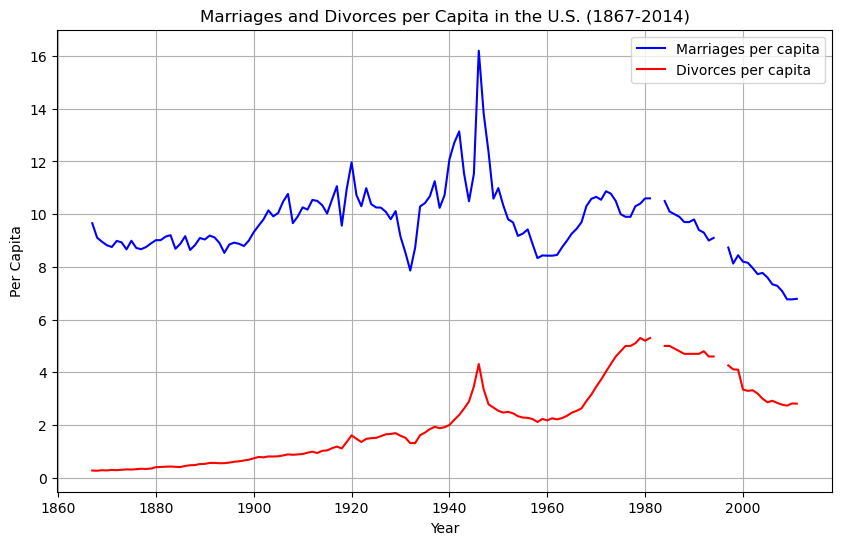

In [22]:
# Define column headings
columns = ["Year", "Marriages", "Divorces", "Population"]

# Create a Pandas DataFrame
# Assuming you have already created the "marriage_data" DataFrame here

# Calculate marriages and divorces per capita
marriage_data["Marriages_per_capita"] = marriage_data["Marriages"] / marriage_data["Population"] * 1000
marriage_data["Divorces_per_capita"] = marriage_data["Divorces"] / marriage_data["Population"] * 1000

# Plotting
plt.figure(figsize=(10, 6))

# Plot the marriages per capita line with a blue color
plt.plot(marriage_data["Year"], marriage_data["Marriages_per_capita"], label="Marriages per capita", color="blue")

# Plot the divorces per capita line with a red color
plt.plot(marriage_data["Year"], marriage_data["Divorces_per_capita"], label="Divorces per capita", color="red")

plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Marriages and Divorces per Capita in the U.S. (1867-2014)")
plt.legend()

plt.grid(True)
plt.show()


# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes

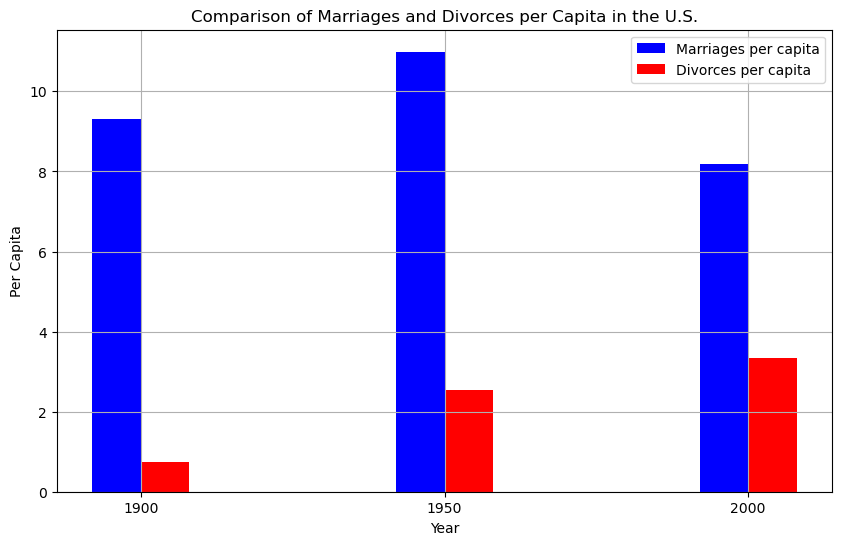

In [24]:
# Calculate marriages and divorces per capita
vertical_data = marriage_data[marriage_data['Year'].isin([1900, 1950, 2000])].copy()
vertical_data["Marriages_per_capita"] = vertical_data["Marriages"] / vertical_data["Population"] * 1000
vertical_data["Divorces_per_capita"] = vertical_data["Divorces"] / vertical_data["Population"] * 1000

# Plotting
plt.figure(figsize=(10, 6))

years = vertical_data["Year"]
marriages_per_capita = vertical_data["Marriages_per_capita"]
divorces_per_capita = vertical_data["Divorces_per_capita"]

# Plot the marriages per capita bars with a blue color
plt.bar(years - 4, marriages_per_capita, width=8, label="Marriages per capita", color="blue")

# Plot the divorces per capita bars with a red color
plt.bar(years + 4, divorces_per_capita, width=8, label="Divorces per capita", color="red")

plt.xlabel("Year")
plt.ylabel("Per Capita")
plt.title("Comparison of Marriages and Divorces per Capita in the U.S.")
plt.xticks(years)
plt.legend()

plt.grid(True)
plt.show()



# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
actor_kill = pd.read_csv('actor_kill_counts.csv')
actor_kill

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


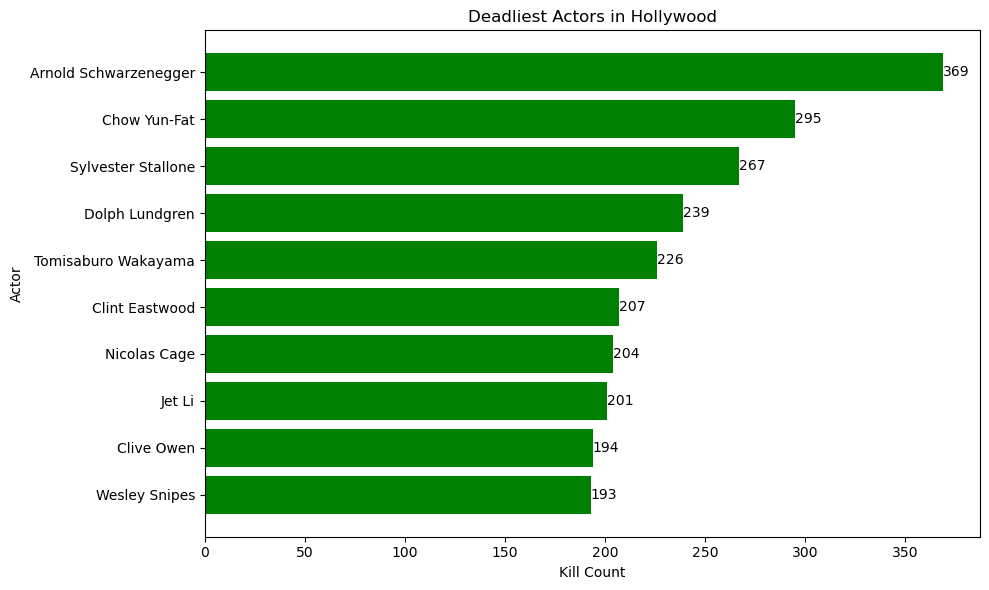

In [30]:
actor_kill = actor_kill.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))

# Plot the horizontal bars with a different color (e.g., green)
plt.barh(actor_kill['Actor'], actor_kill['Count'], color='green')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest kill count at the top

# Label each bar with actor's name and kill count
for index, value in enumerate(actor_kill['Count']):
    plt.text(value, index, str(value), va='center')

plt.tight_layout()
plt.show()



# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [31]:
romans = pd.read_csv('roman-emperor-reigns.csv')
romans

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


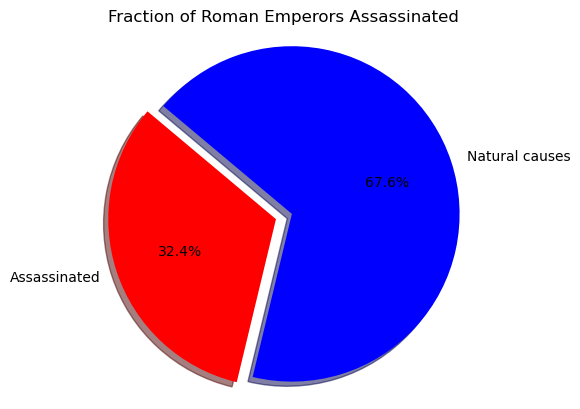

In [34]:
total_emperors = len(romans)
assassinated_emperors = len(romans[romans['Cause_of_Death'] == 'Assassinated'])
percentage_assassinated = (assassinated_emperors / total_emperors) * 100

# Create the pie chart
labels = ['Assassinated', 'Natural causes']
sizes = [percentage_assassinated, 100 - percentage_assassinated]

# Specify the colors for each slice (e.g., 'red' and 'green')
colors = ['red', 'blue']

explode = (0.1, 0)  # Explode the first slice (assassinated)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()



# Question 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [35]:
arcade_vs_doctrates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_vs_doctrates

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


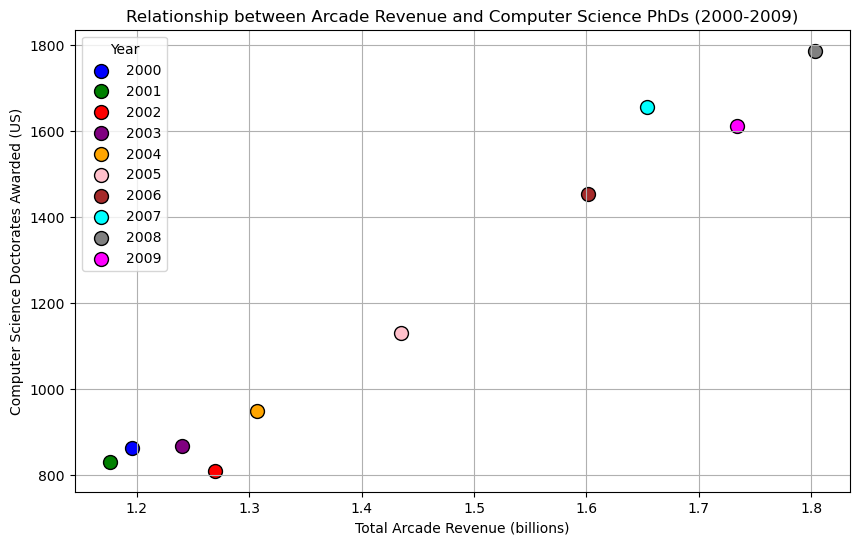

In [38]:
plt.figure(figsize=(10, 6))

# Define a list of colors to use for each year
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'cyan', 'gray', 'magenta']

for i, year in enumerate(arcade_vs_doctrates["Year"]):
    year_data = arcade_vs_doctrates[arcade_vs_doctrates["Year"] == year]
    
    # Use modulo to cycle through the list of colors
    color = colors[i % len(colors)]
    
    plt.scatter(
        year_data["Total Arcade Revenue (billions)"],
        year_data["Computer Science Doctorates Awarded (US)"],
        label=str(year),
        edgecolors="black",
        s=100,
        color=color
    )

# Add labels and title
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.title("Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)")
plt.legend(title="Year")

# Show the plot
plt.grid(True)
plt.show()
